Assigment 1

2025S-T3 AML 3104 - Neural Networks and Deep Learning 01 (DSMM Group 1)

Johan Rodriguez R

C0931102

This notebook analyzes the Algerian forest fire dataset to predict the Fire Weather Index (FWI), which is an indicator of fire risk. The goal is to build regression models using linear, ridge, and lasso techniques, tune them with cross-validation, and evaluate their performance on unseen data.

In [1]:
# Algerian Forest Fire Analysis - Linear Regression Assignment

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

loading the dataset and checking its structure. The dataset contains meteorological variables and fire indices recorded over multiple days and regions.

In [2]:
# 1. Load the dataset
df = pd.read_csv(r"C:\Users\USUARIO\Desktop\Assigment1Neural\Algerian_forest_fires_cleaned (1).csv")

Data Cleaning and Preprocessing

We check for missing values and find none, which means the dataset is clean. We select numeric features for analysis since categorical data cannot be used directly in correlation and regression models.

In [3]:
# 2. Data Cleaning and Preprocessing

# Check data
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (243, 15)
   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  


In [4]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


Feature Selection

Using a correlation heatmap, we identify features that have a strong positive or negative correlation with the target variable, FWI. The selected features are:

Day, Temperature, Relative Humidity (RH), Rain, FFMC, DMC, DC, ISI, BUI

These features will be used as predictors in our regression models.

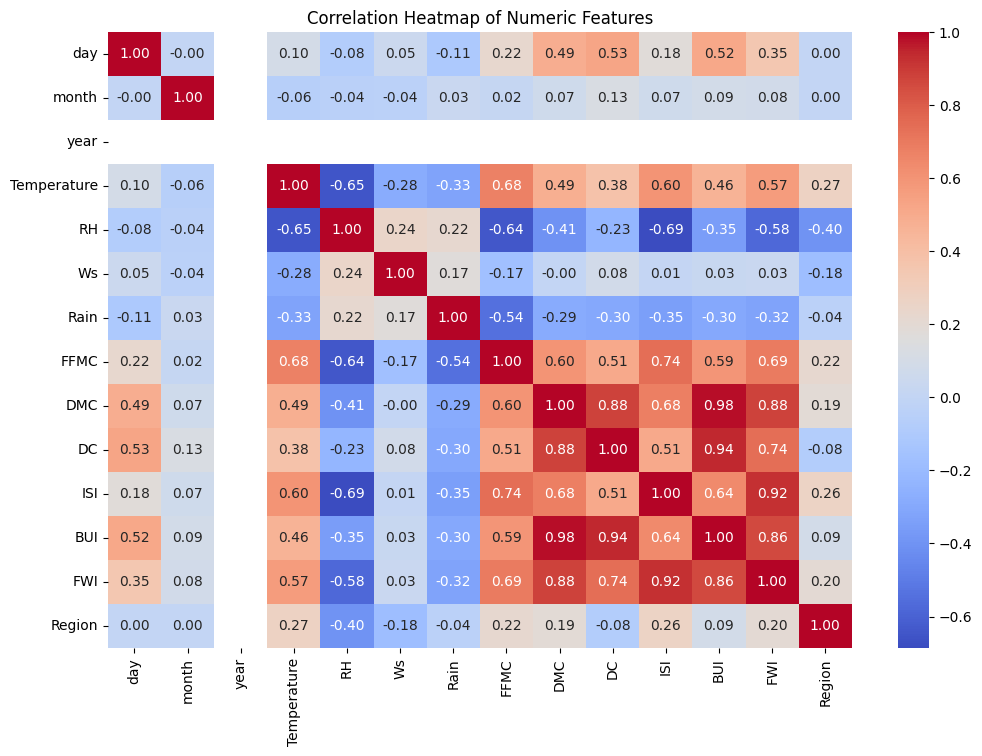

Selected Features based on correlation with FWI:
['day', 'Temperature', 'RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']


In [6]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix on numeric data only
corr = numeric_df.corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# Select features with correlation > 0.3 or < -0.3 with target 'FWI'
target_corr = corr['FWI'].drop('FWI')
selected_features = target_corr[abs(target_corr) > 0.3].index.tolist()

print("Selected Features based on correlation with FWI:")
print(selected_features)

Exploratory Data Analysis (EDA)

Visualize the distribution of FWI and scatter plots of FWI against each selected feature. Observations include:

FWI tends to increase with temperature and various forest indices (FFMC, DMC, etc.).

FWI decreases with relative humidity and rain.

There is some variation in FWI by day of the month.

These relationships justify using these features for regression modeling.

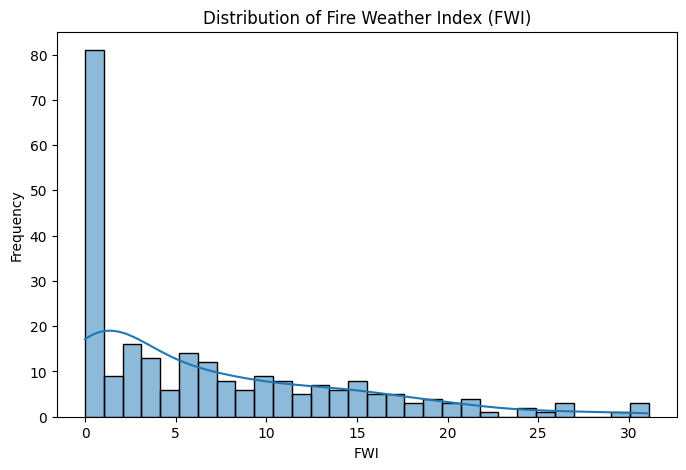

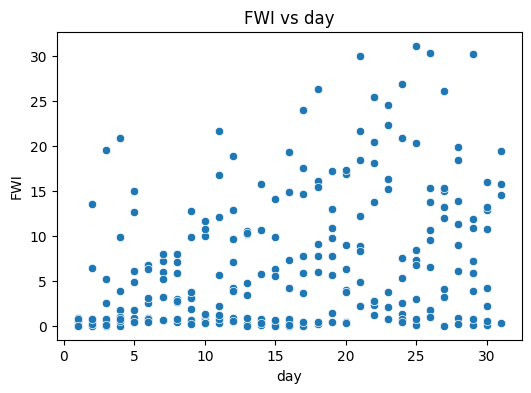

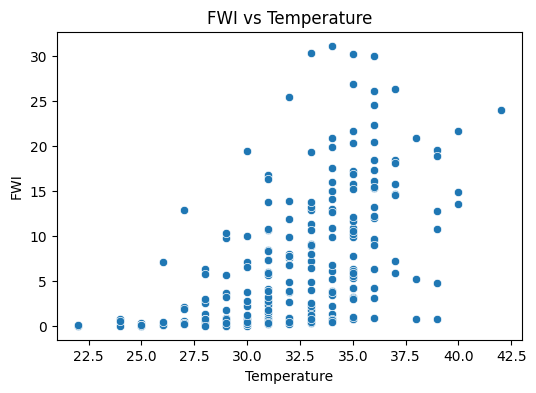

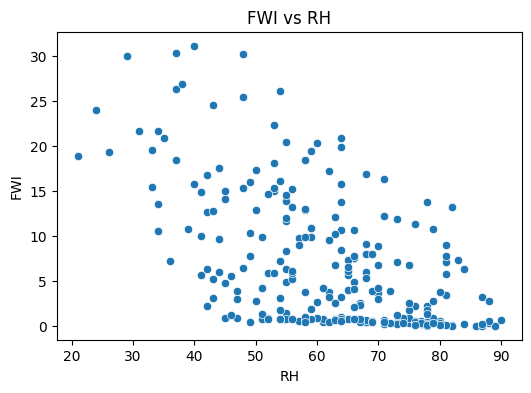

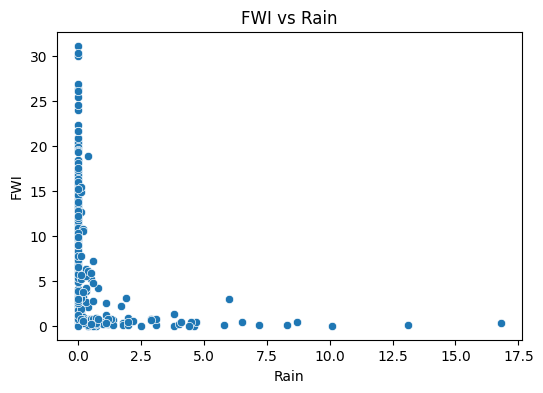

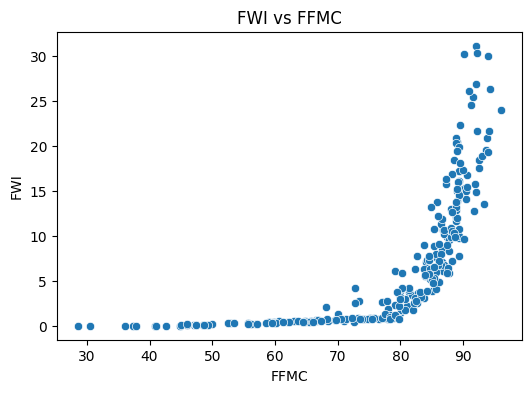

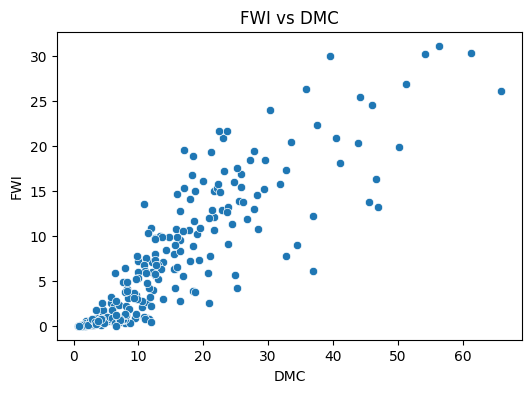

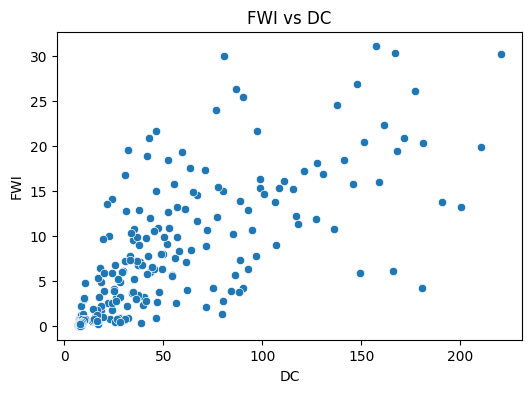

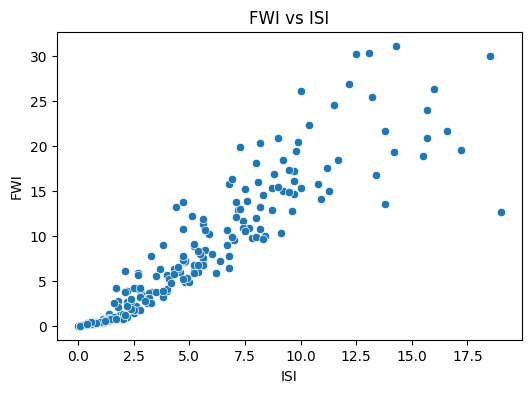

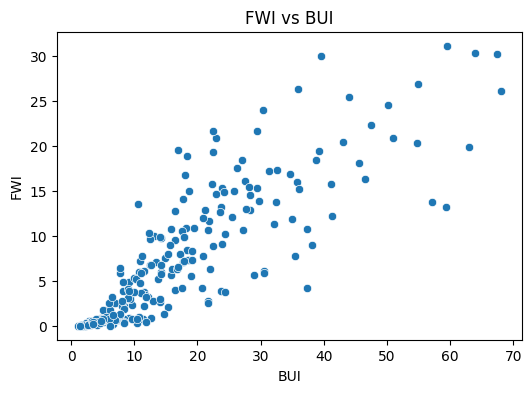

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of FWI
plt.figure(figsize=(8,5))
sns.histplot(df['FWI'], bins=30, kde=True)
plt.title('Distribution of Fire Weather Index (FWI)')
plt.xlabel('FWI')
plt.ylabel('Frequency')
plt.show()

# Scatterplots of FWI vs each selected feature
for feature in ['day', 'Temperature', 'RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[feature], y=df['FWI'])
    plt.title(f'FWI vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('FWI')
    plt.show()

observations from the graphs:
Day: Slight upward trend; FWI tends to increase in later days of the month.

Temperature: Positive relation; higher temperatures often lead to higher FWI.

RH (Relative Humidity): Negative relation; higher humidity relates to lower FWI.

Rain: Mostly low rain values with few spikes; rain generally corresponds with low FWI.

FFMC, DMC, DC, ISI, BUI: Strong positive correlations; all these indices increase with FWI.

Model Building

Split the data into training and testing sets (80%-20%). train three regression models:

Linear Regression: Baseline model without regularization.

Ridge Regression: Linear regression with L2 regularization to reduce overfitting.

Lasso Regression: Linear regression with L1 regularization, which can also perform feature selection.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Prepare feature matrix X and target vector y
X = df[selected_features]
y = df['FWI']

# Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso(max_iter=10000)

# Fit models on training data
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# Evaluate models
def print_metrics(name, y_true, y_pred):
    print(f"{name} Performance:")
    print(f"  RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"  MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"  R2 Score: {r2_score(y_true, y_pred):.4f}\n")

print_metrics("Linear Regression", y_test, y_pred_lr)
print_metrics("Ridge Regression", y_test, y_pred_ridge)
print_metrics("Lasso Regression", y_test, y_pred_lasso)


Linear Regression Performance:
  RMSE: 0.5602
  MAE: 0.4195
  R2 Score: 0.9896

Ridge Regression Performance:
  RMSE: 0.5634
  MAE: 0.4216
  R2 Score: 0.9895

Lasso Regression Performance:
  RMSE: 1.1351
  MAE: 0.7119
  R2 Score: 0.9575



The models are evaluated using Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R² score. Results show excellent performance by Linear and Ridge regression, while Lasso performs slightly worse, likely due to its feature shrinking.

Hyperparameter Tuning and Cross-Validation

We tune the regularization parameter alpha for Ridge and Lasso using 5-fold cross-validation to find the best balance between bias and variance.

Cross-validated RMSE scores indicate Ridge performs best, followed closely by Lasso and Linear Regression.



Cross-validation and hyperparameter tuning for Ridge and Lasso

In [9]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define alpha range
alpha_values = np.logspace(-4, 4, 50)

# Ridge hyperparameter tuning
ridge_cv = GridSearchCV(Ridge(), param_grid={'alpha': alpha_values}, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)
best_alpha_ridge = ridge_cv.best_params_['alpha']
print("Best alpha for Ridge:", best_alpha_ridge)

# Lasso hyperparameter tuning
lasso_cv = GridSearchCV(Lasso(max_iter=10000), param_grid={'alpha': alpha_values}, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)
best_alpha_lasso = lasso_cv.best_params_['alpha']
print("Best alpha for Lasso:", best_alpha_lasso)

# Best models with tuned alpha
best_ridge = Ridge(alpha=best_alpha_ridge)
best_lasso = Lasso(alpha=best_alpha_lasso, max_iter=10000)

# Cross-validated RMSE
cv_rmse_lr = np.sqrt(-cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')).mean()
cv_rmse_ridge = np.sqrt(-cross_val_score(best_ridge, X, y, cv=5, scoring='neg_mean_squared_error')).mean()
cv_rmse_lasso = np.sqrt(-cross_val_score(best_lasso, X, y, cv=5, scoring='neg_mean_squared_error')).mean()

print(f"Cross-validated RMSE (Linear Regression): {cv_rmse_lr:.4f}")
print(f"Cross-validated RMSE (Ridge): {cv_rmse_ridge:.4f}")
print(f"Cross-validated RMSE (Lasso): {cv_rmse_lasso:.4f}")


Best alpha for Ridge: 75.43120063354607
Best alpha for Lasso: 0.2682695795279725
Cross-validated RMSE (Linear Regression): 1.3155
Cross-validated RMSE (Ridge): 1.2570
Cross-validated RMSE (Lasso): 1.2624


Final Model Saving and Testing

Save the best Ridge model with the tuned alpha as a pickle file. Reloading the model and testing on unseen data confirms it maintains high predictive accuracy.

In [10]:
import pickle

# Train best Ridge model on full training data
best_ridge = Ridge(alpha=75.4312)
best_ridge.fit(X_train, y_train)

# Save model as pickle file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_ridge, f)

print("Best Ridge model saved as 'best_model.pkl'")

# Optional: Load and test saved model on test set
with open('best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

y_pred_loaded = loaded_model.predict(X_test)

print("Loaded model test performance:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_loaded)):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_loaded):.4f}")
print(f"R2 Score: {r2_score(y_test, y_pred_loaded):.4f}")


Best Ridge model saved as 'best_model.pkl'
Loaded model test performance:
RMSE: 0.7746
MAE: 0.5441
R2 Score: 0.9802


Conclusion

The Ridge regression model with optimized regularization provides a reliable and robust predictor of the Fire Weather Index. This model can be used for early fire risk assessment in forest management.